In [21]:
import pandas as pd
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

df = pd.read_csv("heart_disease_health_indicators.csv")

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df[['HeartDiseaseorAttack']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)

sr = SMOTE(random_state = 451)
X_resampled, Y_resampled = rs.fit_resample(X_train, y_train)
clf = svm.SVC(kernel="linear", C = 1000, max_iter = 1000)
clf.fit(X_resampled, Y_resampled)

print(f'The training accuracy is {clf.score(X_train, y_train):.2f}')
print(f'The test accuracy is {clf.score(X_test, y_test):.2f}')


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}\n")

/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The training accuracy is 0.77
The test accuracy is 0.77
Accuracy: 0.7663847988488754

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     45934
           1       0.17      0.38      0.24      4799

    accuracy                           0.77     50733
   macro avg       0.55      0.59      0.55     50733
weighted avg       0.85      0.77      0.80     50733




In [4]:
import pandas as pd
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("heart_disease_health_indicators.csv")

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df[['HeartDiseaseorAttack']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)

rs = RandomOverSampler()
X_resampled, Y_resampled = rs.fit_resample(X_train, y_train)
clf = svm.SVC(kernel="linear", C = 1000, max_iter = 1000)
clf.fit(X_resampled, Y_resampled)

print(f'The training accuracy is {clf.score(X_train, y_train):.2f}')
print(f'The test accuracy is {clf.score(X_test, y_test):.2f}')


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}\n")

/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The training accuracy is 0.77
The test accuracy is 0.77
Accuracy: 0.7663847988488754

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     45934
           1       0.17      0.38      0.24      4799

    accuracy                           0.77     50733
   macro avg       0.55      0.59      0.55     50733
weighted avg       0.85      0.77      0.80     50733




In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("heart_disease_health_indicators.csv")

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df[['HeartDiseaseorAttack']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear SVM
svm = svm.SVC(kernel="linear", C = 1000, max_iter = 1000)
svm.fit(X_scaled, y)

# Feature importances
feature_importances = pd.Series(abs(svm.coef_[0]), index=X.columns)
print(feature_importances.sort_values(ascending=False))

/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Smoker               0.579021
HighBP               0.416541
Sex                  0.363414
Income               0.352945
Diabetes             0.293239
Age                  0.269525
Education            0.195193
PhysHlth             0.175790
NoDocbcCost          0.153186
DiffWalk             0.143154
BMI                  0.131092
HvyAlcoholConsump    0.121990
PhysActivity         0.119584
GenHlth              0.087000
Fruits               0.084554
Stroke               0.055034
HighChol             0.052515
AnyHealthcare        0.048410
Veggies              0.019403
MentHlth             0.011431
CholCheck            0.003918
dtype: float64


/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [7]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# L1-based feature selection
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_scaled, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_scaled)

# Indices of important features
important_features = pd.Series(model.get_support(), index=X.columns)
print(important_features[important_features].index.tolist())

/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


HighBP               True
HighChol             True
CholCheck            True
BMI                  True
Smoker               True
Stroke               True
Diabetes             True
PhysActivity         True
Fruits               True
Veggies              True
HvyAlcoholConsump    True
AnyHealthcare        True
NoDocbcCost          True
GenHlth              True
MentHlth             True
PhysHlth             True
DiffWalk             True
Sex                  True
Age                  True
Education            True
Income               True
dtype: bool

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
perm_importance = permutation_importance(svm, X_scaled, y)

# Feature importances
perm_feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns)
print(perm_feature_importances.sort_values(ascending=False))

In [3]:
from sklearn.feature_selection import RFE

# Create the RFE object
rfe = RFE(estimator=svm, n_features_to_select=1)
rfe.fit(X_scaled, y)

# Rankings of the features
ranking = pd.Series(rfe.ranking_, index=X.columns)
print(ranking.sort_values())

/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  w

Age                   1
PhysHlth              2
Education             3
HighBP                4
Sex                   5
BMI                   6
Income                7
GenHlth               8
MentHlth              9
Diabetes             10
Smoker               11
AnyHealthcare        12
Fruits               13
Veggies              14
PhysActivity         15
DiffWalk             16
HvyAlcoholConsump    17
NoDocbcCost          18
HighChol             19
Stroke               20
CholCheck            21
dtype: int64


/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [17]:
import pandas as pd
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("heart_disease_health_indicators.csv")

X = df[['Age','PhysHlth','Education','HighBP','Sex','BMI','Income','GenHlth','MentHlth','Diabetes']]
y = df[['HeartDiseaseorAttack']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)

rs = RandomOverSampler()
X_resampled, Y_resampled = rs.fit_resample(X_train, y_train)
clf = svm.SVC(kernel="linear", C = 1000, max_iter = 1000)
clf.fit(X_resampled, Y_resampled)

print(f'The training accuracy is {clf.score(X_train, y_train):.2f}')
print(f'The test accuracy is {clf.score(X_test, y_test):.2f}')


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}\n")

/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The training accuracy is 0.70
The test accuracy is 0.70
Accuracy: 0.7035263043778212

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     45934
           1       0.15      0.47      0.23      4799

    accuracy                           0.70     50733
   macro avg       0.54      0.60      0.52     50733
weighted avg       0.86      0.70      0.76     50733




In [10]:
import pandas as pd
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("heart_disease_health_indicators.csv")

X = df[['CholCheck','Stroke']]
y = df[['HeartDiseaseorAttack']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)

rs = RandomOverSampler()
X_resampled, Y_resampled = rs.fit_resample(X_train, y_train)
clf = svm.SVC(kernel="linear", C = 1000, max_iter = 1000)
clf.fit(X_resampled, Y_resampled)

print(f'The training accuracy is {clf.score(X_train, y_train):.2f}')
print(f'The test accuracy is {clf.score(X_test, y_test):.2f}')


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}\n")

/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The training accuracy is 0.09
The test accuracy is 0.09
Accuracy: 0.0945932627678237

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45934
           1       0.09      1.00      0.17      4799

    accuracy                           0.09     50733
   macro avg       0.05      0.50      0.09     50733
weighted avg       0.01      0.09      0.02     50733




/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
df = pd.read_csv("heart_disease_health_indicators.csv")
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df[['HeartDiseaseorAttack']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)

# Handle class imbalance with Random Over Sampling
rs = RandomOverSampler(random_state=451)
X_resampled, y_resampled = rs.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
clf = svm.SVC(kernel="linear", C=1000, max_iter=1000)
clf.fit(X_resampled_scaled, y_resampled)

# Evaluate the model
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Training Accuracy: {clf.score(X_resampled_scaled, y_resampled):.2f}')
print(f'Test Accuracy: {accuracy}\n')
print(f"Classification Report:\n{report}\n")

# Feature importances from the initial model
feature_importances = pd.Series(abs(clf.coef_[0]), index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False), "\n")

# Select features based on importance weight threshold
threshold = 0.17 # Set threshold
selected_features = feature_importances[feature_importances > threshold].index

# Create a new dataset with selected features
X_selected = X[selected_features]
X_train_selected, X_test_selected = train_test_split(X_selected, test_size=0.2, random_state=451)

# Scale the selected features
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Retrain the SVM model with selected features
svm_selected = svm.SVC(kernel="linear", C=1000, max_iter=1000)
svm_selected.fit(X_train_selected_scaled, y_train)

# Evaluate the retrained model
y_pred_selected = svm_selected.predict(X_test_selected_scaled)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)
print(f'Retrained Model Test Accuracy: {accuracy_selected}\n')
print(f"Retrained Model Classification Report:\n{report_selected}\n")


/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Accuracy: 0.55
Test Accuracy: 0.5098062405140639

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.50      0.65     45934
           1       0.11      0.60      0.19      4799

    accuracy                           0.51     50733
   macro avg       0.52      0.55      0.42     50733
weighted avg       0.85      0.51      0.61     50733


Feature Importances:
 PhysActivity         0.222825
CholCheck            0.219672
Smoker               0.213356
Education            0.202831
HvyAlcoholConsump    0.183003
PhysHlth             0.177839
Fruits               0.149866
GenHlth              0.116889
HighBP               0.089145
Age                  0.082274
MentHlth             0.068620
Sex                  0.059442
Diabetes             0.049252
Stroke               0.048485
BMI                  0.043683
HighChol             0.039916
AnyHealthcare        0.024495
DiffWalk             0.016751
Income               0.01616

/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Retrained Model Test Accuracy: 0.8957877515620997

Retrained Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     45934
           1       0.21      0.04      0.06      4799

    accuracy                           0.90     50733
   macro avg       0.56      0.51      0.50     50733
weighted avg       0.84      0.90      0.86     50733




/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


/Users/frenkie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


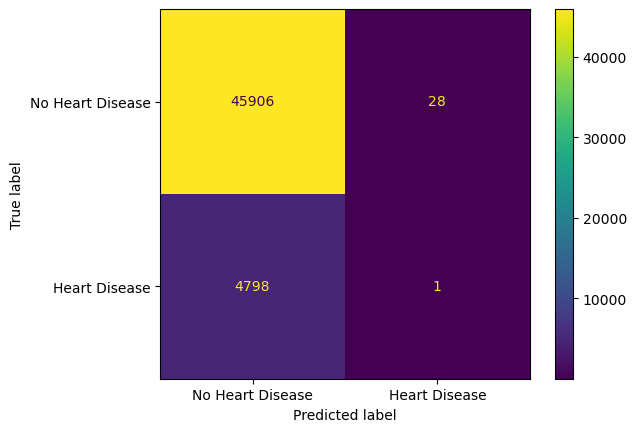

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot()
plt.show()